## Sorting Contours

We can sort contours in many ways.

In [1]:
#github repository sync in google colab
import os
try:
  # Colab only
  !git clone https://github.com/hukim1112/DLCV_CLASS.git
  os.chdir('/content/DLCV_CLASS/lecture4')      
except Exception:
  pass

Cloning into 'DLCV_CLASS'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 259 (delta 54), reused 118 (delta 40), pack-reused 127
Receiving objects: 100% (259/259), 34.29 MiB | 11.61 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

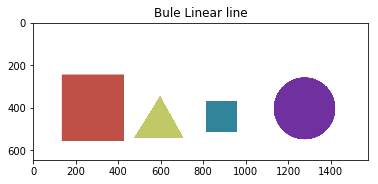

In [3]:
# Load our image
image = cv2.imread('data/bunchofshapes.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Bule Linear line')

plt.show()

('Number of contours found = ', 4)


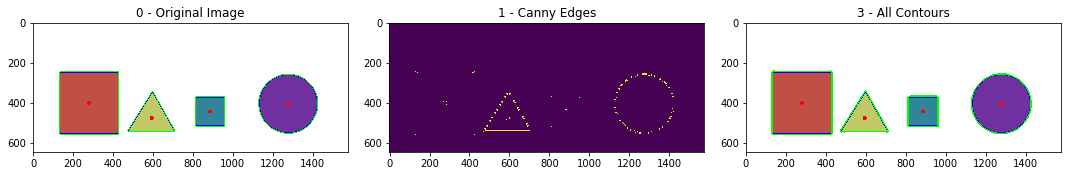

In [17]:
row, col = 1, 3
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('0 - Original Image')
cv2.imwrite('original_rgb.jpg', image)


# Create a black image with same dimensions as our loaded image
blank_image = np.zeros((image.shape[0], image.shape[1], 3))
# Create a copy of our original image
orginal_image = image
# Grayscale our image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# Find Canny edges
edged = cv2.Canny(gray, 50, 200)
axs[1].imshow(edged)
axs[1].set_title('1 - Canny Edges')
cv2.imwrite('original_rgb.jpg', edged)

# Find contours and print how many were found
_, contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of contours found = ", len(contours))

# Draw all contours over blank image
cv2.drawContours(image, contours, -1, (0,255,0), 3)
axs[2].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[2].set_title('3 - All Contours')
cv2.imwrite('original_rgb.jpg', image)

plt.show()

### Let's now sort by area

In [0]:
def get_contour_areas(contours):
    # returns the areas of all contours as list
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

In [19]:
# Let's print the areas of the contours before sorting
print("Contor Areas before sorting")
print(get_contour_areas(contours))

Contor Areas before sorting
[23618.5, 25938.5, 70954.5, 96031.0]


In [20]:
# Sort contours large to small
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
#sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)[:3]
print("Contor Areas after sorting") 
print(get_contour_areas(sorted_contours))

Contor Areas after sorting
[96031.0, 70954.5, 25938.5, 23618.5]


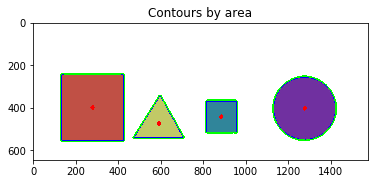

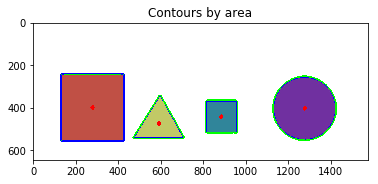

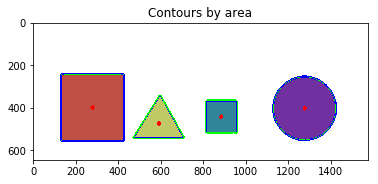

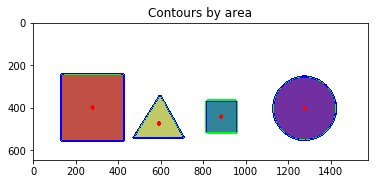

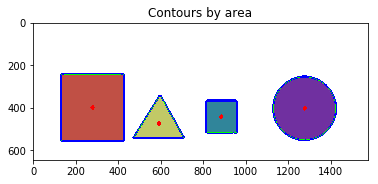

In [21]:
for c in sorted_contours:
    plt.imshow(cv2.cvtColor(orginal_image, cv2.COLOR_BGR2RGB))
    plt.title('Contours by area'); plt.show()
    cv2.drawContours(orginal_image, [c], -1, (255,0,0), 3)
plt.imshow(cv2.cvtColor(orginal_image, cv2.COLOR_BGR2RGB))
plt.title('Contours by area'); plt.show()

In [0]:
orginal_image = image.copy()

In [0]:
# Returns center point for each
# contour object in an image
def label_contour_center(image, c):
    # Places a red circle on the centers of contours
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    # Draw the countour number on the image
    cv2.circle(image,(cx,cy), 10, (0,0,255), -1)

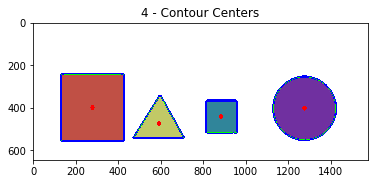

In [24]:
# Computer Center of Mass or centroids and draw them on our image
for (i, c) in enumerate(contours):
    label_contour_center(image, c)
    
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('4 - Contour Centers')

plt.show()

In [0]:
def x_cord_contour(contours):
    #Returns the X cordinate for the contour centroid
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass

In [0]:
def display_left_to_right_contour(i):
    plt.imshow(cv2.cvtColor(orginal_image, cv2.COLOR_BGR2RGB))
    plt.title('6 - Left to Right Contour'); plt.show()
    image_name = "output_shape_number_" + str(i) + ".jpg"
    print(image_name)
    return image_name

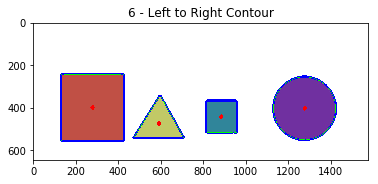

output_shape_number_0.jpg


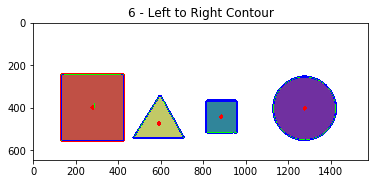

output_shape_number_1.jpg


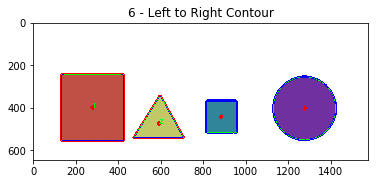

output_shape_number_2.jpg


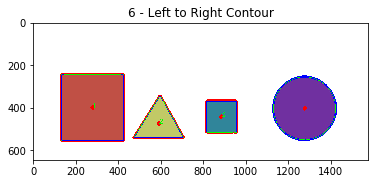

output_shape_number_3.jpg


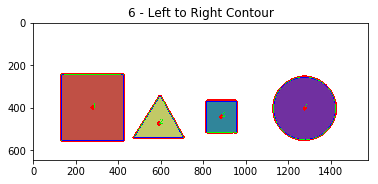

output_shape_number_4.jpg


True

In [27]:
# Sort by left to right using our x_cord_contour function
contours_left_to_right = sorted(contours, key = x_cord_contour, reverse = False)

# Labeling Contours left to right
for (i,c)  in enumerate(contours_left_to_right):
    if i == 0: display_left_to_right_contour(i)
    cv2.drawContours(orginal_image, [c], -1, (0,0,255), 3)  
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(orginal_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    # Draw an approximate 
    # rectangle around the binary image
    (x, y, w, h) = cv2.boundingRect(c)  
    
    cropped_contour = orginal_image[y:y + h, x:x + w]
    
    # Let's now crop each contour and save these images
    cv2.imwrite(display_left_to_right_contour(i+1), cropped_contour)
    
cv2.imwrite('contours_left_to_right.jpg', orginal_image)



In [0]:
output_images = []
for x in range(i+1):
    output_images.append(cv2.imread('output_shape_number_' + str(x+1) + '.jpg'))

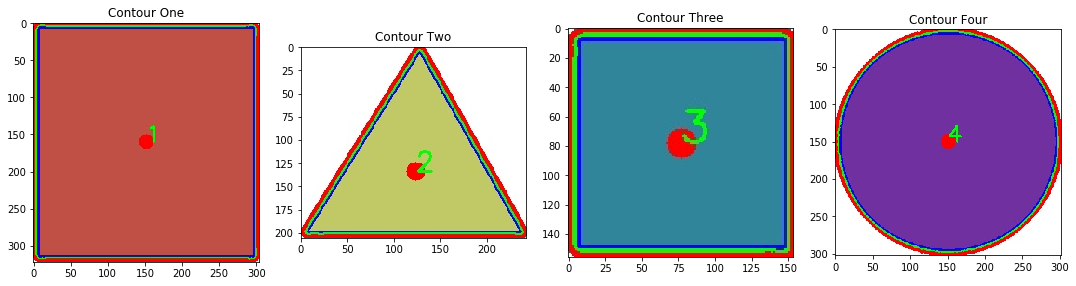

In [29]:
row, col = 1, 4
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(cv2.cvtColor(output_images[0], cv2.COLOR_BGR2RGB))
axs[0].set_title('Contour One')

axs[1].imshow(cv2.cvtColor(output_images[1], cv2.COLOR_BGR2RGB))
axs[1].set_title('Contour Two')

axs[2].imshow(cv2.cvtColor(output_images[2], cv2.COLOR_BGR2RGB))
axs[2].set_title('Contour Three')

axs[3].imshow(cv2.cvtColor(output_images[3], cv2.COLOR_BGR2RGB))
axs[3].set_title('Contour Four')

plt.show()